## Plant Disease Prediction


## Importing libraries

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns0

## Data Preprocessing

### Training Image preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1967 files belonging to 4 classes.


## Validation Image Preprocessing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 420 files belonging to 4 classes.


In [48]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [52]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[164.625    187.6289    69.69141 ]
   [145.38672  169.21094   61.148438]
   [135.91797  157.        92.33594 ]
   ...
   [100.9375   119.        98.875   ]
   [100.9375   119.        98.875   ]
   [100.9375   119.        98.875   ]]

  [[170.80078  193.80078   77.5625  ]
   [150.77734  173.96484   67.46484 ]
   [141.1914   162.1914    98.25    ]
   ...
   [ 98.       115.        96.      ]
   [ 98.       115.        96.      ]
   [ 98.       115.        96.      ]]

  [[175.01953  195.08203   85.25    ]
   [157.5      181.5       73.1875  ]
   [142.375    163.84766   93.65234 ]
   ...
   [ 97.       115.3125    95.3125  ]
   [ 97.       115.3125    95.3125  ]
   [ 97.       115.3125    95.3125  ]]

  ...

  [[ 53.        56.        46.      ]
   [ 52.8125    55.8125    45.8125  ]
   [ 53.        56.        46.      ]
   ...
   [ 55.        55.        55.      ]
   [ 55.        55.        55.      ]
   [ 55.        55.        55.      ]]

  [[ 53.        56.        46.    

## Building Model

In [29]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [54]:
model= Sequential()

cnn = tf.keras.models.Sequential()

# Add convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# More convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten after the last convolutional block
cnn.add(tf.keras.layers.Flatten())

# Dense layers (Fully Connected)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=, activation='softmax'))  # Example: output for 10 classes

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [58]:
cnn.add(tf.keras.layers.Flatten())

In [60]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [62]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [64]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [69]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [71]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 2, 2, 64)            │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 0, 0, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 0, 0, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 0, 0, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,102,666 (19.47 MB)

 Trainable params: 5,102,666 (19.47 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 498ms/step - accuracy: 0.4709 - loss: 9.5086 - val_accuracy: 0.8476 - val_loss: 0.4527
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 496ms/step - accuracy: 0.8320 - loss: 0.4560 - val_accuracy: 0.8548 - val_loss: 0.4376
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 567ms/step - accuracy: 0.8715 - loss: 0.3487 - val_accuracy: 0.8952 - val_loss: 0.3421
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 662ms/step - accuracy: 0.9132 - loss: 0.2692 - val_accuracy: 0.9286 - val_loss: 0.2516
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 606ms/step - accuracy: 0.9415 - loss: 0.2110 - val_accuracy: 0.9262 - val_loss: 0.3202
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 600ms/step - accuracy: 0.9334 - loss: 0.2220 - val_accuracy: 0.9357 - val_loss: 0.2886
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 601ms/step - accuracy: 0.9158 - loss: 0.2584 - val_accuracy: 0.9143 - val_loss: 0.3498
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 613ms/step - accuracy: 0.9619 - loss: 0.1092 - val_accu

## Evaluating Model

In [92]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9891 - loss: 0.0316
Training accuracy: 0.9918658137321472


In [94]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9442 - loss: 0.3454
Validation accuracy: 0.9404761791229248


## Saving Model

In [97]:
cnn.save('trained_plant_disease_model.keras')


In [99]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6237925887107849,
  0.83833247423172,
  0.885104238986969,
  0.920183002948761,
  0.9273004531860352,
  0.9247584939002991,
  0.9267920851707458,
  0.9664463400840759,
  0.9588205218315125,
  0.9613624811172485],
 'loss': [3.2508976459503174,
  0.4343431890010834,
  0.3196173310279846,
  0.2413811981678009,
  0.25569915771484375,
  0.22596076130867004,
  0.21296526491641998,
  0.09926562011241913,
  0.1256449818611145,
  0.11986973136663437],
 'val_accuracy': [0.8476190567016602,
  0.8547618985176086,
  0.8952381014823914,
  0.9285714030265808,
  0.9261904954910278,
  0.9357143044471741,
  0.9142857193946838,
  0.9261904954910278,
  0.9309523701667786,
  0.9404761791229248],
 'val_loss': [0.45273852348327637,
  0.43762505054473877,
  0.34213948249816895,
  0.2516201436519623,
  0.3202219605445862,
  0.2885702848434448,
  0.34982261061668396,
  0.3565147817134857,
  0.3831728398799896,
  0.35349079966545105]}

In [101]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [103]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

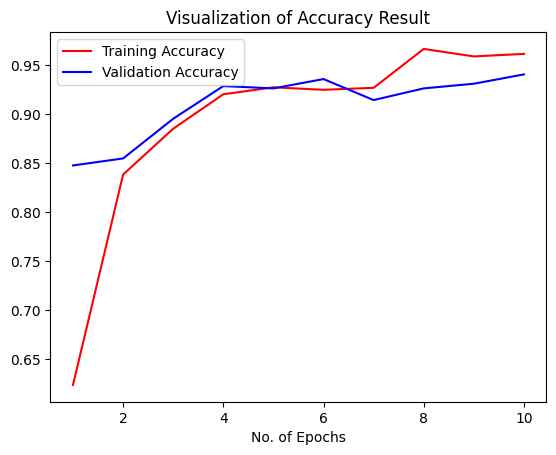

In [106]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [109]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 420 files belonging to 4 classes.


In [117]:
Y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [119]:
Y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [130]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [132]:
Y_true

<tf.Tensor: shape=(420,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [134]:
predicted_categories

<tf.Tensor: shape=(420,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [138]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [148]:
class_name = ['bark_eating_caterpillar', 'gummosis', 'leaf_eating_caterpillar', 'shootborer']


In [150]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                         precision    recall  f1-score   support

bark_eating_caterpillar       0.93      0.98      0.95       166
               gummosis       0.93      0.96      0.95        55
leaf_eating_caterpillar       0.98      0.92      0.95        66
             shootborer       0.94      0.89      0.92       133

               accuracy                           0.94       420
              macro avg       0.95      0.94      0.94       420
           weighted avg       0.94      0.94      0.94       420



## Confusion Matrix Visualizationn

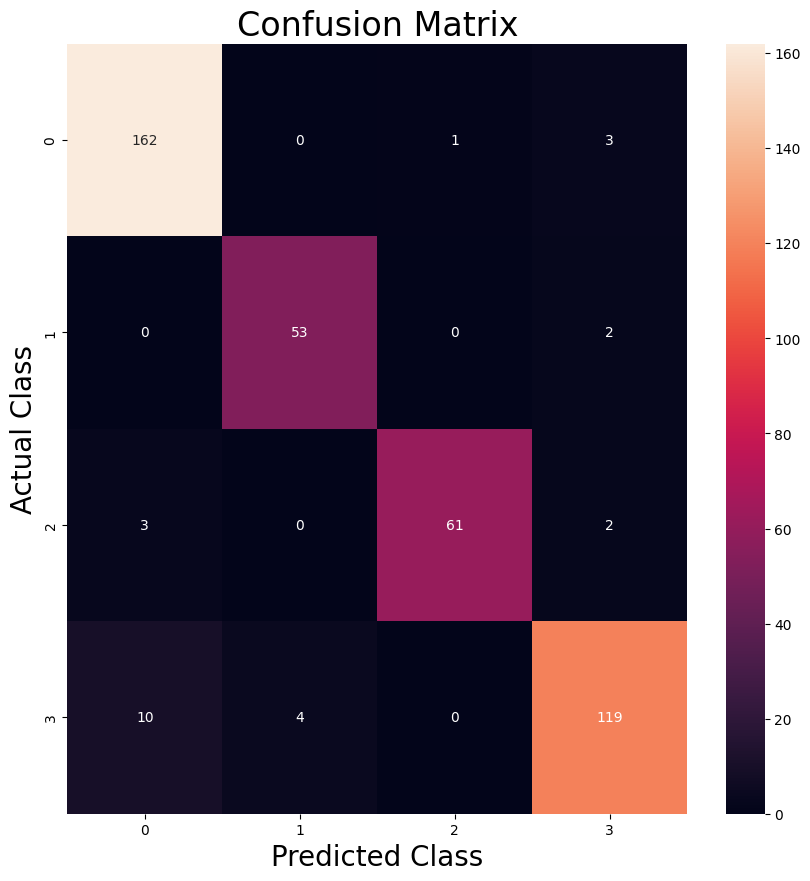

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_true and predicted_categories are defined
cm = confusion_matrix(Y_true, predicted_categories)

plt.figure(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='g')  # fmt='g' for integer values
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
